# 이전 내용 복습

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = "Malgun Gothic"

In [3]:
df = pd.read_csv("Data/test.csv", encoding = "CP949", low_memory = False)
df.shape

(573680, 39)

In [5]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드         float64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드        float64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호       float64
건물명           object
도로명주소         object
구우편번호          int64
신우편번호        float64
동정보           object
층정보          float64
호정보          float64
경도           float64
위도           float64
dtype: object

In [7]:
df["시도명"].unique()

array(['서울특별시', '부산광역시'], dtype=object)

In [10]:
city = df["시도명"].value_counts()
city

서울특별시    407376
부산광역시    166304
Name: 시도명, dtype: int64

In [11]:
city_normal = df["시도명"].value_counts(normalize = True)
city_normal

서울특별시    0.71011
부산광역시    0.28989
Name: 시도명, dtype: float64

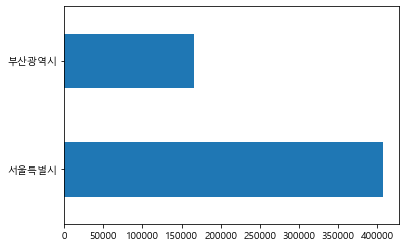

In [12]:
city.plot.barh()

# 데이터 색인하기
https://www.edwith.org/boostcourse-ds-510/lecture/59917/

In [31]:
# 상권업종 중분류명을 봅시다.
df["상권업종중분류명"].nunique()
df["상권업종중분류명"].unique()

# 너무 많은 관계로 우리는 상권업종대분류명을 이용하자.
df["상권업종대분류명"].unique()
df_dorm = df[df["상권업종대분류명"] == "숙박"].copy() #copy 뒤에 ()가 있고없고도 달라지는 구나.
df_dorm.head(2)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
670,22821670,더그랜드호텔명동,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,1.114010e+24,NaN,서울특별시 중구 명동8가길 38,100861,4537.0,NaN,1.0,NaN,126.987136,37.561656
690,23150939,세피앙,NaN,O,숙박,O02,모텔/여관/여인숙,O02A01,모텔/여관/여인숙,I55112,...,1.111010e+24,NaN,서울특별시 종로구 돈화문로11가길 49,110340,3132.0,NaN,1.0,NaN,126.990445,37.574777


In [49]:
# 상권업종대분류명이 의료인 데이터셋에서, 상권업종중분류명(column)만 가져오기.
df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"]

38           병원
52           병원
99           병원
122          병원
132          병원
          ...  
573606    유사의료업
573607    유사의료업
573608    유사의료업
573609    유사의료업
573655       병원
Name: 상권업종중분류명, Length: 25509, dtype: object

In [53]:
df_dorm["시도명"].value_counts()

서울특별시    3083
부산광역시    2244
Name: 시도명, dtype: int64

In [104]:
m = df["상권업종대분류명"] == "숙박"
df.loc[m,"상권업종중분류명"].value_counts()

모텔/여관/여인숙    3943
호텔/콘도        1045
민박/하숙         201
캠프/별장/펜션      120
유스호스텔          18
Name: 상권업종중분류명, dtype: int64

In [75]:
#유스호스텔만 따로 모아보자.
df[df["상권업종중분류명"] == "유스호스텔"]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
32927,25236297,영리빙텔,NaN,O,숙박,O04,유스호스텔,O04A01,유스호스텔,I55114,...,1.141010e+24,NaN,서울특별시 서대문구 신촌로 173-1,120808,3766.0,NaN,3.0,NaN,126.945266,37.556965
36349,25457669,스토리하우스리빙텔,NaN,O,숙박,O04,유스호스텔,O04A01,유스호스텔,I55114,...,1.144010e+24,신성빌딩,서울특별시 마포구 신촌로 220,121859,4114.0,NaN,3.0,NaN,126.950078,37.556791
39664,25595272,금천글로벌빌리지센터,NaN,O,숙박,O04,유스호스텔,O04A01,유스호스텔,I55114,...,1.154510e+24,NaN,서울특별시 금천구 가산로 116,153801,8529.0,NaN,3.0,NaN,126.893142,37.476061
40335,25588661,힐스베라스오피스첼,NaN,O,숙박,O04,유스호스텔,O04A01,유스호스텔,I55114,...,1.154510e+24,NaN,서울특별시 금천구 가산로 116,153801,8529.0,NaN,5.0,NaN,126.893142,37.476061
76247,25325678,르호봇신촌,NaN,O,숙박,O04,유스호스텔,O04A01,유스호스텔,I55114,...,1.144010e+24,현대벤처빌,서울특별시 마포구 백범로 10,121807,4100.0,NaN,3.0,NaN,126.936711,37.553653
108215,25584413,대방레지던스,NaN,O,숙박,O04,유스호스텔,O04A01,유스호스텔,I55114,...,1.156010e+24,NaN,서울특별시 영등포구 영등포로 406,150050,7354.0,NaN,1.0,NaN,126.923116,37.512920
109703,25550578,케이레지던스,NaN,O,숙박,O04,유스호스텔,O04A01,유스호스텔,I55114,...,1.144010e+24,NaN,서울특별시 마포구 신촌로16길 34,121807,4057.0,NaN,6.0,NaN,126.934179,37.554234
109803,25505070,스테이하이,NaN,O,숙박,O04,유스호스텔,O04A01,유스호스텔,I55114,...,1.144010e+24,NaN,서울특별시 마포구 신촌로12다길 5,121807,4057.0,NaN,2.0,NaN,126.932979,37.555070
123281,23158726,블루보트게스트하우스,NaN,O,숙박,O04,유스호스텔,O04A01,유스호스텔,I55114,...,2.611010e+24,NaN,부산광역시 중구 광복로85번길 15-1,600022,48951.0,NaN,NaN,1.0,129.034774,35.099785
146331,25312816,이화고시텔,NaN,O,숙박,O04,유스호스텔,O04A01,유스호스텔,I55114,...,1.141010e+24,NaN,서울특별시 서대문구 이화여대5길 8,120808,3766.0,NaN,2.0,NaN,126.945290,37.558443


In [79]:
df["상호명"].value_counts().head(10)

점프셈교실              2297
CU                 2287
GS25               2047
간단하지만특별한화피디Cafe    1718
세븐일레븐              1372
이디야커피               546
개별용달                450
크린토피아               426
스타벅스                385
파리바게뜨               381
Name: 상호명, dtype: int64

In [81]:
df_dorm["상호명"].value_counts()

테마모텔        13
로즈모텔        12
24게스트하우스    10
휴모텔         10
호텔야자        10
            ..
짝            1
맥스호텔         1
명화여관         1
그린힐모텔        1
호텔라온         1
Name: 상호명, Length: 4273, dtype: int64

In [85]:
#위의 뒤죽박죽을 좀 정리해보자.
df_food = df[df["상권업종대분류명"] == "음식"]
print(df_food.shape)
df_food["상호명"].value_counts().head(10)

(185516, 39)


간단하지만특별한화피디Cafe    1616
이디야커피               545
파리바게뜨               380
스타벅스                378
김밥천국                366
뚜레쥬르                227
BBQ치킨               221
BHC치킨               195
본죽                  173
배스킨라빈스31            173
Name: 상호명, dtype: int64

# 여러 조건으로 색인하기

In [96]:
#약국이면서 서울.
seoul_pharmacy = df[(df["상권업종소분류명"] == "약국") & (df["시도명"] == "서울특별시")]

In [100]:
seoul_pharmacy.shape

(3583, 39)